In [4]:
# Si usas Google Colab
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/Colab")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Se importan las librerias
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de entrenamiento
train_data = pd.read_csv('Microsoft_Stock.csv', index_col='Date', parse_dates=True)

In [6]:
train_data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [7]:
train_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


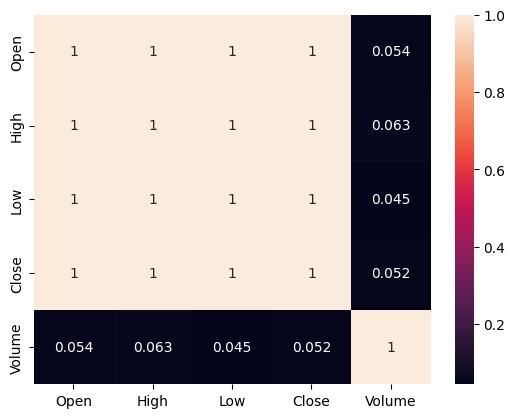

In [8]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

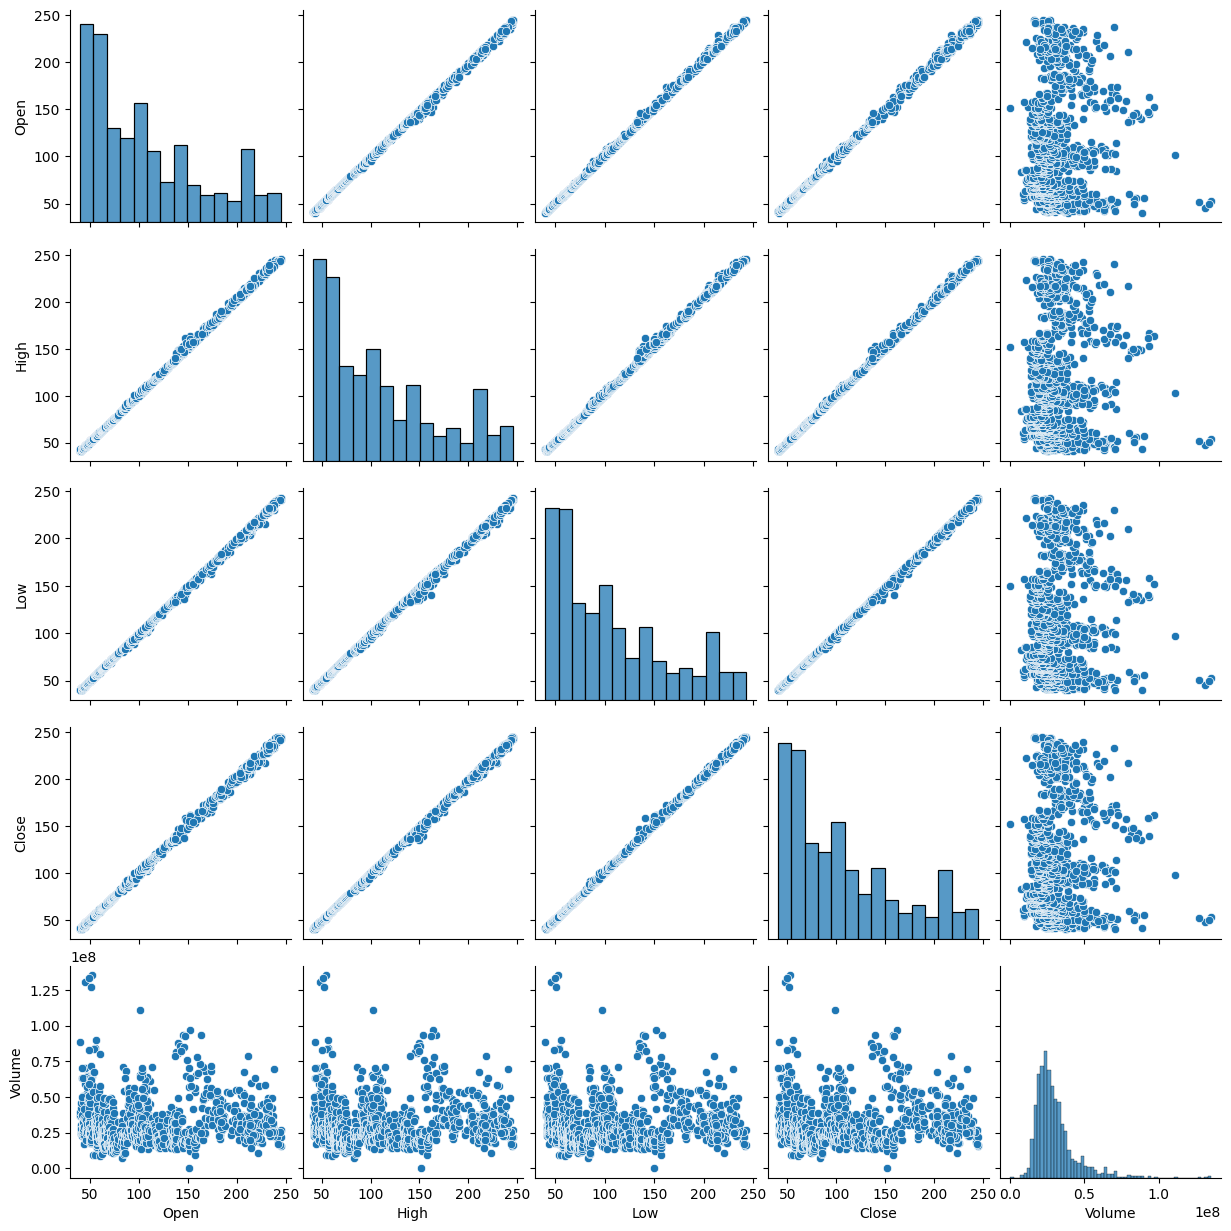

In [9]:
sns.pairplot(train_data)
plt.show()

In [10]:
#train_data = np.round(train_data)
median = train_data.Open.median()
train_data_or = train_data[train_data['Open'] >=median ][['High','Low','Close']]

In [11]:
Quantiles = np.zeros(4)
for i in range(4):
  Quantiles[i] = train_data.Open.quantile(1/(i+1))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.3972
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0014
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 8.1150e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 6.4648e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 6.1715e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


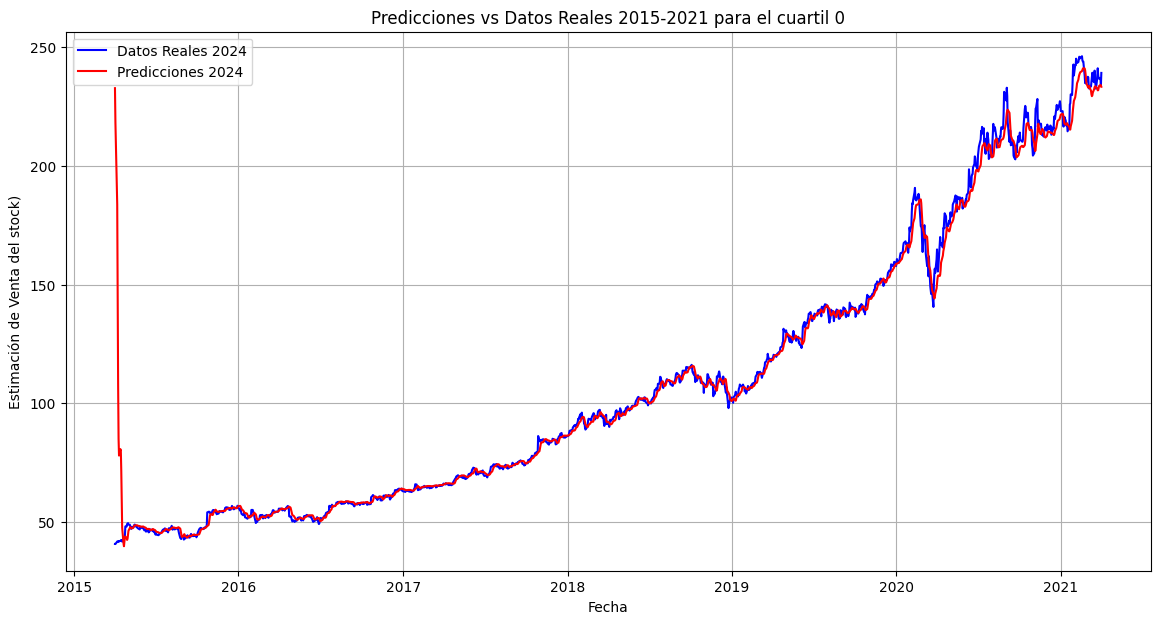

R-squared para el mes 1: 0.9956719709509559
R-squared para el mes 2: 0.9951498881024261
R-squared para el mes 3: 0.9962908899247739
R-squared para el mes 4: 0.5431134793017829
R-squared para el mes 5: 0.9983228403121691
R-squared para el mes 6: 0.9968105127079381
R-squared para el mes 7: 0.9973610676197641
R-squared para el mes 8: 0.9963131713341583
R-squared para el mes 9: 0.9980228747156343
R-squared para el mes 10: 0.9969154006638681
R-squared para el mes 11: 0.9966724121159019
R-squared para el mes 12: 0.9982174312260449
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.1279
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 5.5169e-04
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 4.9708e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 4.7626e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 6.6567e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


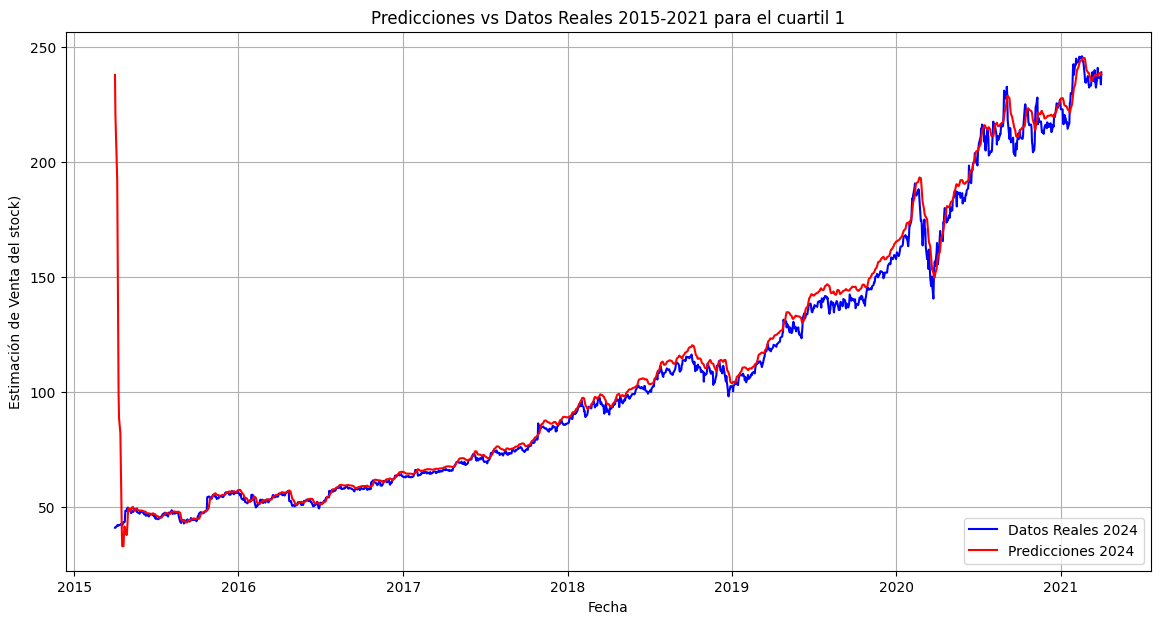

R-squared para el mes 1: 0.9954496311970125
R-squared para el mes 2: 0.9946278851338459
R-squared para el mes 3: 0.9945483386322013
R-squared para el mes 4: 0.493402144236061
R-squared para el mes 5: 0.9943490262328315
R-squared para el mes 6: 0.9966433482966198
R-squared para el mes 7: 0.996016608505386
R-squared para el mes 8: 0.9952964338654656
R-squared para el mes 9: 0.9937758171727434
R-squared para el mes 10: 0.9940610027142358
R-squared para el mes 11: 0.9950792089881734
R-squared para el mes 12: 0.9959822967271736
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0746
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.8523e-04
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 5.2021e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 4.7400e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.7240e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


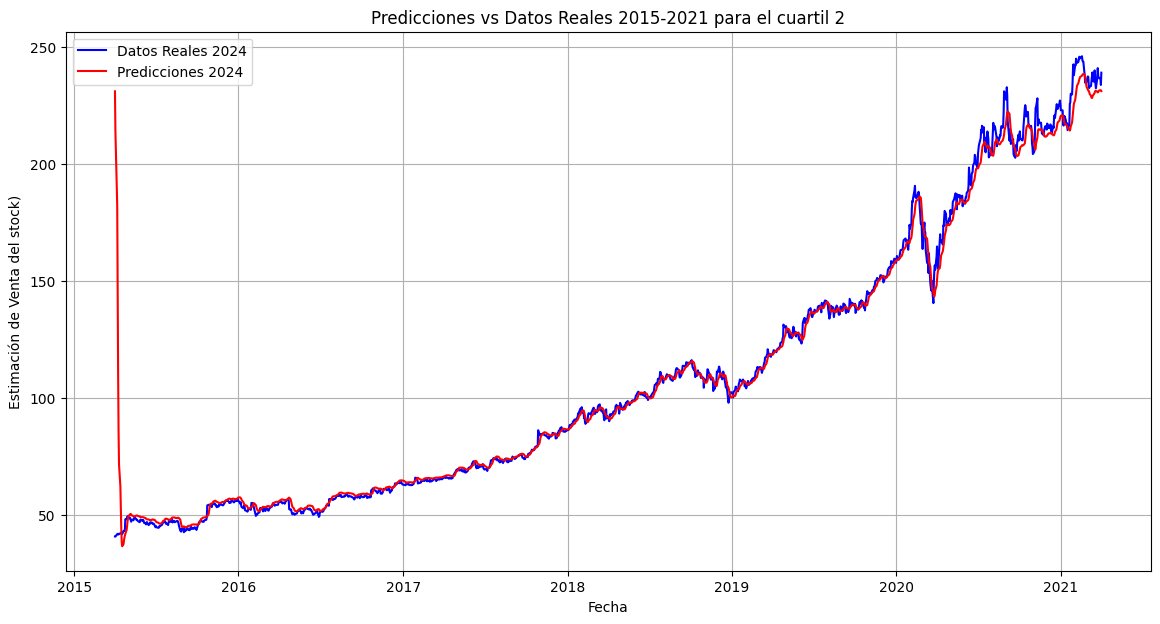

R-squared para el mes 1: 0.9950527458402031
R-squared para el mes 2: 0.9945404307094243
R-squared para el mes 3: 0.995655773622128
R-squared para el mes 4: 0.568369596907203
R-squared para el mes 5: 0.9982178952737694
R-squared para el mes 6: 0.9967275882015156
R-squared para el mes 7: 0.9974466543407562
R-squared para el mes 8: 0.995742057564169
R-squared para el mes 9: 0.9977265245201107
R-squared para el mes 10: 0.9969734386843276
R-squared para el mes 11: 0.996384488428859
R-squared para el mes 12: 0.9978029975410142
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0702
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.6086e-04
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 5.3658e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 8.0380e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.4815e-04
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


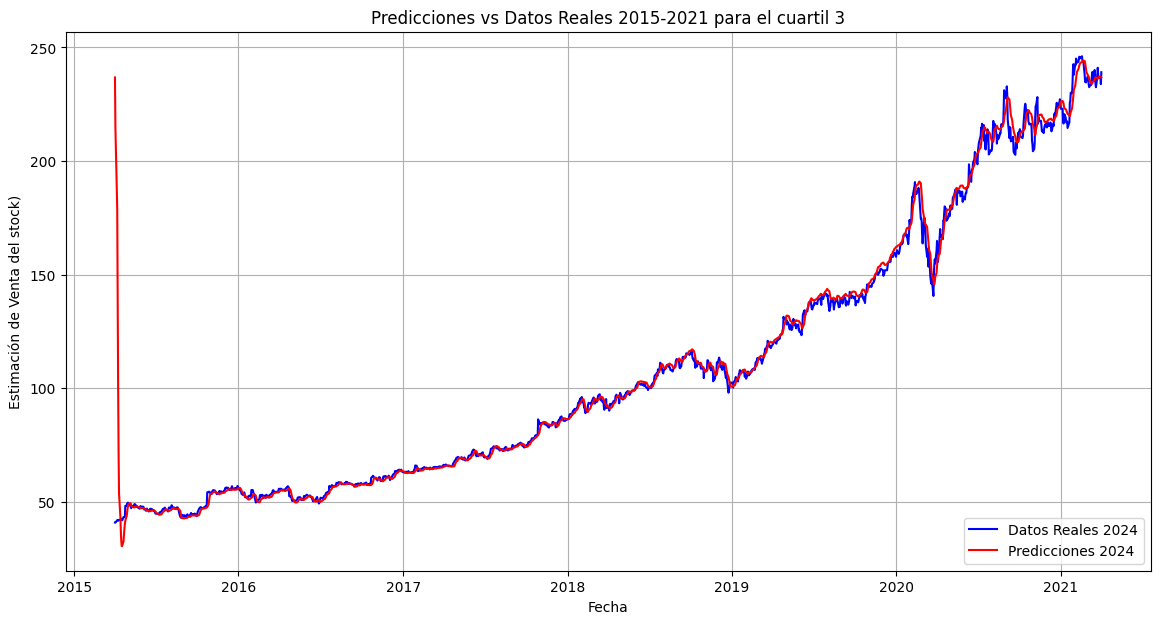

R-squared para el mes 1: 0.9969698208500278
R-squared para el mes 2: 0.9961137078287654
R-squared para el mes 3: 0.9970139827755101
R-squared para el mes 4: 0.5811751122365196
R-squared para el mes 5: 0.9982855923595216
R-squared para el mes 6: 0.9986658033853674
R-squared para el mes 7: 0.9979458082979039
R-squared para el mes 8: 0.9977068888525954
R-squared para el mes 9: 0.996742897605938
R-squared para el mes 10: 0.9969233794143935
R-squared para el mes 11: 0.9973447948643377
R-squared para el mes 12: 0.9986663748780547


In [12]:
Numero_de_Epocas=5

import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import r2_score

#train_data = np.round(train_data)
for i in range(4):
  train_data_or = train_data[train_data['Open'] <= Quantiles[0] ][['High','Low','Close']]
  # Limpieza de datos
  train_data_or.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
  imputer = SimpleImputer(strategy='mean')
  train_data_or = pd.DataFrame(imputer.fit_transform(train_data_or), columns=train_data_or.columns, index=train_data_or.index)
  # Escalado de datos
  scaler = MinMaxScaler(feature_range=(0, 1))    ###transforma los datos en ceros y uno
  train_scaled = scaler.fit_transform(train_data_or)
  # Crear secuencias de temporales, datos para el entrenamiento
  def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
      a = dataset[i:(i + look_back), :]
      X.append(a)
      Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
  X_train, y_train = create_dataset(train_scaled, 60)
  # Modelo LSTM
  model = Sequential([
      LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),  #return_sequences=True Devuelve salidas para cada paso (necesario para apilar LSTM)
      Dropout(0.2), #evita el sobreajuste , apaga aleatoriamete el 20% de las neuronas durante el entrenamiento#
      LSTM(100, return_sequences=False), #return sequences = False nos da la salid final y no toda la secuencia
      Dense(1) #capa final densa
      ])
  model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
  # Entrenar el modelo
  model.fit(X_train, y_train, epochs=Numero_de_Epocas, batch_size=32, verbose=1)
  # Preparar los datos reales de 2024 para comparación
  real_data_2024 = pd.read_csv('Microsoft_Stock.csv', index_col='Date', parse_dates=True)
  real_data_2024 = real_data_2024[['High','Low','Close']]
  real_data_2024.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
  real_data_2024 = pd.DataFrame(imputer.transform(real_data_2024), columns=real_data_2024.columns, index=real_data_2024.index)
  real_scaled = scaler.transform(real_data_2024)
  # Crear datos de entrada para predicción
  X_real, _ = create_dataset(np.vstack([train_scaled[-60:], real_scaled]), 60)
  # Predicciones
  predictions_scaled = model.predict(X_real)
  predictions = scaler.inverse_transform(np.concatenate([predictions_scaled, np.zeros((len(predictions_scaled), 2))], axis=1))[:, 0]
  # Datos reales para comparar
  real_demand = scaler.inverse_transform(real_scaled)[:, 0]
  # Graficar
  plt.figure(figsize=(14, 7))
  plt.plot(real_data_2024.index, real_demand, label='Datos Reales 2024', color='blue')
  plt.plot(real_data_2024.index[:len(predictions)], predictions, label='Predicciones 2024', color='red')
  plt.title(f'Predicciones vs Datos Reales 2015-2021 para el cuartil {i}')
  plt.xlabel('Fecha')
  plt.ylabel('Estimación de Venta del stock)')
  plt.legend()
  plt.grid(True)
  plt.show()
  # Asegurarse de que tanto 'real_demand' como 'predictions' tienen el mismo índice de tiempo
  real_demand = pd.Series(real_demand[:len(predictions)], index=real_data_2024.index[:len(predictions)])
  predictions_series = pd.Series(predictions, index=real_data_2024.index[:len(predictions)])
  # Crear una lista para almacenar los R-squared de cada mes
  r_squared_monthly = []
  # Agrupar los datos por mes y calcular el R-squared para cada mes
  for month, group in real_demand.groupby(real_demand.index.month):
    # Extraer las predicciones correspondientes para ese mes
    pred_for_month = predictions_series[group.index]
    # Calcular el R-squared
    r_squared = r2_score(group, pred_for_month)
    # Almacenar el resultado
    r_squared_monthly.append((month, r_squared))
    print(f'R-squared para el mes {month}: {r_squared}')
